In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [4]:
df = pd.read_csv('train.csv')
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


In [21]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature', 'n_beats',
       'n_bars', 'popularity_confidence', 'processing', 'genre'],
      dtype='object')

In [10]:
columns = ['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
           'speechiness', 'acousticness', 'instrumentalness', 'liveness',
           'valence', 'tempo', 'features_duration_ms', 'time_signature', 'n_beats',
           'n_bars', 'popularity_confidence', 'processing']

correlation = df[columns].corr()
correlation

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
duration_ms,1.000000,-0.076202,-0.080932,0.102996,0.039403,-0.074774,-0.184902,0.079685,-0.021184,-0.141938,0.048765,0.999918,0.009033,0.839313,0.838041,-0.005830,-0.010400
popularity,-0.076202,1.000000,0.051046,-0.056547,0.046703,-0.096382,0.078424,-0.266843,0.027105,0.077652,-0.024162,-0.076228,-0.003160,-0.084774,-0.089134,-0.003665,0.008733
danceability,-0.080932,0.051046,1.000000,0.193940,0.385244,0.111454,-0.199082,-0.202316,-0.174193,0.559578,0.092267,-0.080891,0.292167,-0.033604,-0.069332,0.011602,-0.026273
energy,0.102996,-0.056547,0.193940,1.000000,0.720907,0.143454,-0.699454,-0.203111,0.191024,0.284069,0.331538,0.102985,0.204646,0.243586,0.208615,0.040022,-0.037847
loudness,0.039403,0.046703,0.385244,0.720907,1.000000,0.109793,-0.552519,-0.447106,0.047502,0.377743,0.308203,0.039415,0.250568,0.165565,0.131064,0.049174,-0.020563
speechiness,-0.074774,-0.096382,0.111454,0.143454,0.109793,1.000000,-0.087997,-0.115803,0.050034,0.056068,0.062161,-0.074722,0.080739,-0.043217,-0.040820,0.026399,-0.022909
acousticness,-0.184902,0.078424,-0.199082,-0.699454,-0.552519,-0.087997,1.000000,0.094256,-0.075924,-0.131961,-0.244244,-0.184846,-0.139706,-0.283324,-0.248164,-0.021155,0.022684
instrumentalness,0.079685,-0.266843,-0.202316,-0.203111,-0.447106,-0.115803,0.094256,1.000000,-0.088589,-0.348955,-0.117466,0.079757,-0.123982,0.034830,0.044498,-0.025716,-0.012960
liveness,-0.021184,0.027105,-0.174193,0.191024,0.047502,0.050034,-0.075924,-0.088589,1.000000,-0.035305,-0.008141,-0.021158,-0.063152,-0.015254,-0.015667,-0.025104,0.014917
valence,-0.141938,0.077652,0.559578,0.284069,0.377743,0.056068,-0.131961,-0.348955,-0.035305,1.000000,0.157773,-0.141968,0.193726,-0.072477,-0.095825,0.004771,-0.005609


loudness and energy, energy and acousticness, un po valence con danceability

In [13]:
spotify_data = df

C:\Users\Lavigi\programmi\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lavigi\programmi\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Lavigi\programmi\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\Lavigi\programmi\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress 

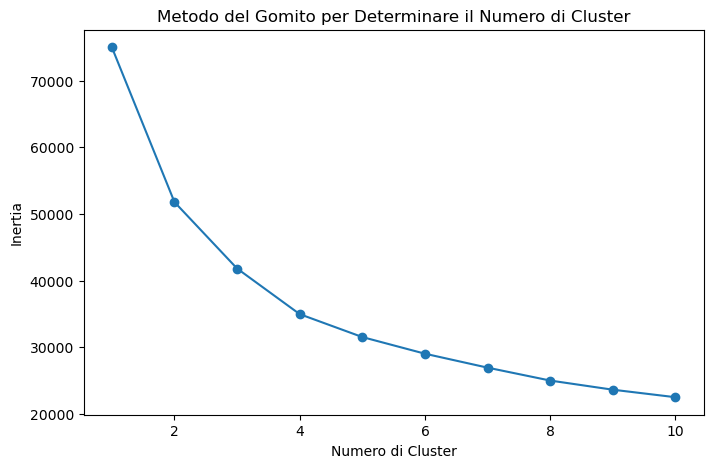

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Selezioniamo le variabili audio di interesse per il clustering
audio_features = spotify_data[['danceability', 'energy', 'valence', 'loudness', 'tempo']].dropna()

# Standardizzazione delle variabili (necessaria per K-Means)
scaler = StandardScaler()
audio_features_scaled = scaler.fit_transform(audio_features)

# Determiniamo il numero ottimale di cluster utilizzando il metodo del gomito
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(audio_features_scaled)
    inertia.append(kmeans.inertia_)

# Visualizziamo il grafico per il metodo del gomito
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Numero di Cluster')
plt.ylabel('Inertia')
plt.title('Metodo del Gomito per Determinare il Numero di Cluster')
plt.show()

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Selezioniamo le variabili audio di interesse per il clustering
audio_features = spotify_data[['danceability', 'energy', 'valence', 'loudness', 'tempo']].dropna()

# Standardizzazione delle variabili
scaler = StandardScaler()
audio_features_scaled = scaler.fit_transform(audio_features)

# Creazione del dendrogramma per visualizzare la gerarchia dei cluster
linked = linkage(audio_features_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogramma del Metodo di Ward')
plt.xlabel('Indice dei Campioni')
plt.ylabel('Distanza')
plt.show()

# Applicazione del clustering gerarchico con il metodo di Ward
# Scegli il numero di cluster desiderato, ad esempio 4
n_clusters = 4
ward_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = ward_clustering.fit_predict(audio_features_scaled)

# Aggiungiamo i cluster al DataFrame originale
spotify_data['Ward_Cluster'] = clusters

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', hue='Ward_Cluster', data=spotify_data, palette='viridis', legend='full')
plt.title('Clustering con il Metodo di Ward')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000019D78BA34C0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000019D792D0EA0> (for post_execute):



KeyboardInterrupt



ne vengono fatti 4

In [ ]:
n_clusters = 3
ward_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = ward_clustering.fit_predict(audio_features_scaled)

# Aggiungiamo i cluster al DataFrame originale
spotify_data['Ward_Cluster'] = clusters

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', hue='Ward_Cluster', data=spotify_data, palette='viridis', legend='full')
plt.title('Clustering con il Metodo di Ward')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

In [ ]:
n_clusters = 2
ward_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = ward_clustering.fit_predict(audio_features_scaled)

# Aggiungiamo i cluster al DataFrame originale
spotify_data['Ward_Cluster'] = clusters

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', hue='Ward_Cluster', data=spotify_data, palette='viridis', legend='full')
plt.title('Clustering con il Metodo di Ward')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

In [19]:
df.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000
mean,2.468075e+05,27.423667,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,2.467947e+05,3.876179,501.862333,128.39340,0.490479,2.199647
std,1.279941e+05,18.587534,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,1.279850e+05,0.566491,280.689804,75.11391,0.291330,1.212616
min,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,0.000000,0.00000,0.000000,0.748116
25%,1.800000e+05,14.000000,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,1.800000e+05,4.000000,327.000000,83.00000,0.230000,1.170953
50%,2.278260e+05,24.000000,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,2.278185e+05,4.000000,461.000000,117.00000,0.480000,1.738916
75%,2.889030e+05,42.000000,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,2.889030e+05,4.000000,625.000000,159.00000,0.739000,3.349057
max,4.120258e+06,94.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.939000,0.996000,1.000000,0.994000,0.995000,220.525000,4.120258e+06,5.000000,7348.000000,2170.00000,1.000000,4.067086


## Standardizzazione e correlazione

In [26]:
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [44]:
# Creiamo un'istanza di StandardScaler
scaler = StandardScaler()

# Adattiamo il scaler ai dati e trasformiamo i dati
standardized_data = scaler.fit_transform(df[columns])

standardized_df = pd.DataFrame(standardized_data, columns=columns)

In [46]:
standardized_df

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
0,-0.039437,0.999431,0.715310,-0.541799,-0.605102,0.158245,-0.005753,0.650965,0.328795,0.714789,0.598325,-0.039339,0.218584,0.232071,0.167839,NaN,-0.758998
1,1.540689,-1.475429,-2.481888,-1.740911,-2.648529,-0.037820,-0.063412,1.690353,0.733324,-1.454678,-1.488278,1.540899,0.218584,0.410209,0.354228,NaN,0.138354
2,0.677386,-1.314025,-0.968238,0.748097,0.241441,-0.508373,-0.921953,1.340409,0.231503,0.188115,-0.203212,0.677542,0.218584,0.534906,0.447423,NaN,1.237725
3,0.179643,-0.237999,-0.144484,-0.269446,0.547489,-0.083952,-0.720722,-0.745497,-0.510988,-0.187051,0.556327,0.179756,0.218584,0.417335,0.354228,-0.073742,-0.758998
4,0.475378,-0.130396,0.473332,0.116388,-0.407120,-0.344602,-0.920476,-0.495757,0.420966,0.722004,0.652663,0.475519,0.218584,0.823490,0.727008,NaN,1.540059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.447135,-1.475429,0.015119,0.002908,-0.888671,-0.322689,-0.873669,0.857276,-0.434179,-1.455039,-0.181571,1.447345,NaN,1.194019,1.113101,NaN,0.138354
14996,-0.500520,0.891828,-2.306840,0.770793,-1.786999,-0.280016,0.740776,1.706023,-0.480264,-1.570114,-0.964411,-0.500448,-1.546737,-0.801133,-0.484526,NaN,0.138354
14997,1.197623,0.838027,1.276493,-0.458580,-0.034634,-0.281170,-0.916671,1.489266,-0.745001,-1.320484,0.090306,1.197808,0.218584,1.194019,1.073161,NaN,0.138354
14998,-0.387199,0.515219,-0.206265,1.186889,1.098308,-0.353829,-0.921201,-0.748778,0.948391,-0.601898,1.156517,-0.387126,0.218584,0.039681,0.021390,NaN,-0.758998


In [48]:
standardized_df.corr()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
duration_ms,1.000000,-0.076202,-0.080932,0.102996,0.039403,-0.074774,-0.184902,0.079685,-0.021184,-0.141938,0.048765,0.999918,0.009033,0.839313,0.838041,-0.005830,-0.010400
popularity,-0.076202,1.000000,0.051046,-0.056547,0.046703,-0.096382,0.078424,-0.266843,0.027105,0.077652,-0.024162,-0.076228,-0.003160,-0.084774,-0.089134,-0.003665,0.008733
danceability,-0.080932,0.051046,1.000000,0.193940,0.385244,0.111454,-0.199082,-0.202316,-0.174193,0.559578,0.092267,-0.080891,0.292167,-0.033604,-0.069332,0.011602,-0.026273
energy,0.102996,-0.056547,0.193940,1.000000,0.720907,0.143454,-0.699454,-0.203111,0.191024,0.284069,0.331538,0.102985,0.204646,0.243586,0.208615,0.040022,-0.037847
loudness,0.039403,0.046703,0.385244,0.720907,1.000000,0.109793,-0.552519,-0.447106,0.047502,0.377743,0.308203,0.039415,0.250568,0.165565,0.131064,0.049174,-0.020563
speechiness,-0.074774,-0.096382,0.111454,0.143454,0.109793,1.000000,-0.087997,-0.115803,0.050034,0.056068,0.062161,-0.074722,0.080739,-0.043217,-0.040820,0.026399,-0.022909
acousticness,-0.184902,0.078424,-0.199082,-0.699454,-0.552519,-0.087997,1.000000,0.094256,-0.075924,-0.131961,-0.244244,-0.184846,-0.139706,-0.283324,-0.248164,-0.021155,0.022684
instrumentalness,0.079685,-0.266843,-0.202316,-0.203111,-0.447106,-0.115803,0.094256,1.000000,-0.088589,-0.348955,-0.117466,0.079757,-0.123982,0.034830,0.044498,-0.025716,-0.012960
liveness,-0.021184,0.027105,-0.174193,0.191024,0.047502,0.050034,-0.075924,-0.088589,1.000000,-0.035305,-0.008141,-0.021158,-0.063152,-0.015254,-0.015667,-0.025104,0.014917
valence,-0.141938,0.077652,0.559578,0.284069,0.377743,0.056068,-0.131961,-0.348955,-0.035305,1.000000,0.157773,-0.141968,0.193726,-0.072477,-0.095825,0.004771,-0.005609


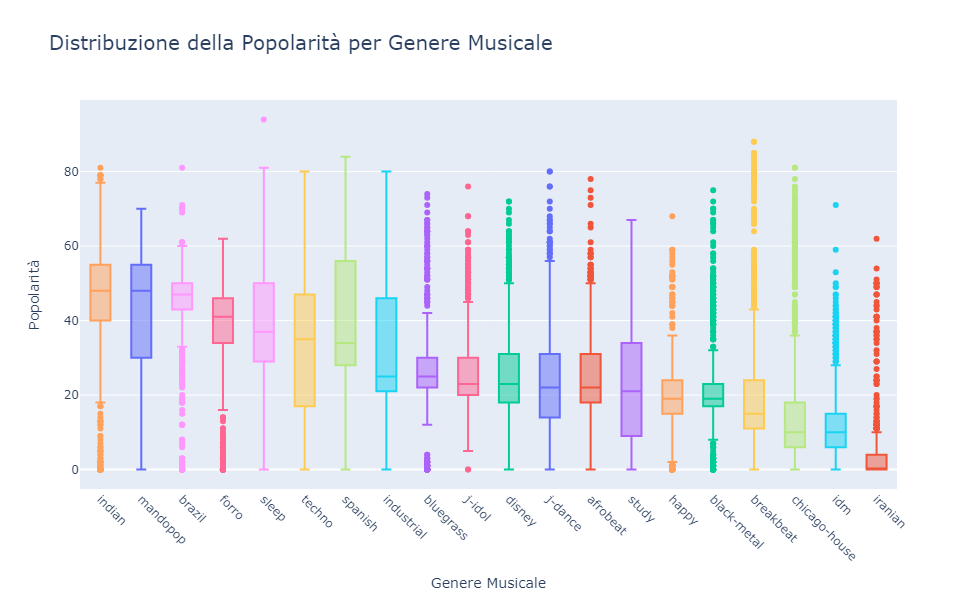

In [79]:
# Calcola la mediana della popolarità per ogni genere
median_popularity_by_genre = df.groupby('genre')['popularity'].median().reset_index()

# Ordina i generi in base alla mediana della popolarità
median_popularity_by_genre = median_popularity_by_genre.sort_values(by='popularity', ascending=False)

# Crea un ordine per i generi basato sulla mediana
ordered_genres = median_popularity_by_genre['genre']

# Imposta l'ordine dei generi nel DataFrame originale
df['genre'] = pd.Categorical(df['genre'], categories=ordered_genres, ordered=True)

# Crea il box plot con Plotly
fig = px.box(df, x='genre', y='popularity', color='genre', title='Distribuzione della Popolarità per Genere Musicale')

# Personalizza il layout per rendere la figura più grande
fig.update_layout(
    width=1000,  # Larghezza della figura
    height=600,  # Altezza della figura
    xaxis_title='Genere Musicale',
    yaxis_title='Popolarità',
    title_font_size=20,
    showlegend=False,
    xaxis=dict(
        categoryorder='array',
        categoryarray=ordered_genres
    )
)

# Ruota le etichette dei generi per una migliore leggibilità
fig.update_xaxes(tickangle=45)

# Mostra il grafico
fig.show()

In [6]:
x = "prova"

USARE .INFO PER VEDERE IL TIPO DI VARAIBILI

df.describe(include="all")

In [ ]:
df.isnull().any()